In [1]:
pip install CompactObject-TOV

# import all the packages used here

In [2]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.RMF_EOS as RMF
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.Strangeon_EOS as Strangeon
import TOVsolver.main as main
import matplotlib.pyplot as plt
import numpy as np
import math
from TOVsolver.unit import g_cm_3,dyn_cm_2,km,Msun,MeV,fm
#from TOVsolver.maximum_central_density import maximum_central_density

In [4]:
Tolos_crust_out=np.loadtxt("Tolos_crust_out.txt")
eps_crust_T_out=Tolos_crust_out[:,3] * g_cm_3
pres_crust_T_out=Tolos_crust_out[:,4] * dyn_cm_2
eps_com,pres_com=crust.PolyInterpolate(eps_crust_T_out,pres_crust_T_out)

In [6]:
print(eps_com/g_cm_3)

[1.03170000e+04 1.04710000e+05 1.04570000e+06 ... 1.88293286e+14
 1.89416330e+14 1.90546072e+14]


In [8]:
print(dyn_cm_2)
print(g_cm_3)

3.167330533234082e-36
2.850597479910674e-15


In [10]:
print(Tolos_crust_out[:,3])

[1.0317e+04 1.0471e+05 1.0457e+06 8.2138e+06 1.0462e+07 4.1659e+07
 1.3176e+08 2.6269e+08 2.7220e+08 2.9508e+08 5.2496e+08 8.3212e+08
 1.3191e+09 1.4132e+09 1.5319e+09 1.6609e+09 2.0908e+09 2.6324e+09
 3.0881e+09 3.3151e+09 5.2552e+09 8.3320e+09 1.1285e+10 1.2615e+10
 1.6635e+10 2.0947e+10 2.7622e+10 3.1718e+10 4.1828e+10 5.2673e+10
 6.3269e+10 6.9462e+10 9.7955e+10 1.0520e+11 1.2711e+11 1.4035e+11
 1.8299e+11 2.0067e+11 2.3584e+11 2.6163e+11 2.8364e+11 3.4112e+11
 4.0556e+11 4.3721e+11]


In [12]:
print(pres_crust_T_out)

[3.02141162e-17 1.69068937e-15 7.36119289e-14 1.71526785e-12
 2.34091065e-12 1.68226427e-11 8.27053349e-11 2.11764552e-10
 2.20477878e-10 2.37480109e-10 5.17541809e-10 9.62551749e-10
 1.78741964e-09 1.88117262e-09 2.09617102e-09 2.27598037e-09
 3.09856779e-09 4.21825080e-09 5.22356152e-09 5.50133640e-09
 1.01864517e-08 1.88538517e-08 2.82655744e-08 3.12979767e-08
 4.52706553e-08 6.15634036e-08 8.90241593e-08 1.01706151e-07
 1.47068659e-07 1.99959911e-07 2.55274172e-07 2.73293115e-07
 4.31992211e-07 4.70887030e-07 6.05751964e-07 6.36665110e-07
 9.06363305e-07 9.83139398e-07 1.21894716e-06 1.39954834e-06
 1.49060910e-06 1.90559274e-06 2.39912619e-06 2.45727837e-06]


In [14]:
# m_sig = 495.0/197.33
# m_w = 3.96544
# m_rho = 3.86662

# g_sigma = math.sqrt(107.5751)
# g_omega = math.sqrt(182.3949)
# g_rho = math.sqrt(206.4260)

# kappa = 3.091114168/197.33
# lambda_0 = -0.00168015405
# zeta = 0.024
# Lambda_w = 0.045
# theta = np.array([m_sig,m_w,m_rho,g_sigma,g_omega,g_rho,kappa,lambda_0,zeta,Lambda_w])
# eps,pres = RMF.compute_EOS(eps_com,pres_com,theta,return_tag=False)
#EOS = RMF.compute_EOS(eps_com,pres_com,theta,return_tag=True)

In [16]:
# eps_total = np.array([*eps_com,*EOS[1]])
# pres_total = np.array([*pres_com,*EOS[2]])

In [18]:
# eps_total = np.array([*eps_com,*eps])
# pres_total = np.array([*pres_com,*pres])

In [20]:
# print(eps_total)
# print(len(eps_total/g_cm_3))
# print(len(EOS[0]* fm**(-3)/g_cm_3))

In [22]:
# datanan = np.zeros(1147-103)
# EOS0 = EOS[0]* fm**(-3)/g_cm_3
# dataconc = np.concatenate((datanan, EOS0))
# dataconc

In [24]:
# len(dataconc)

In [26]:
data_k = np.loadtxt("data_k")
pressure = data_k[:,0]*dyn_cm_2
density = data_k[:,1]*g_cm_3

In [28]:
print(density[-1]/g_cm_3)

134161400000000.0


In [32]:
import random
gamma_values = np.array([2.135,2.5,2.865])
rho_ts = np.array([1.50e14,2.20e14])
#rho_ts = np.array([8.8087e13,1.8078e15])
theta = np.append(gamma_values, rho_ts)

In [34]:
print(gamma_values)

[2.135 2.5   2.865]


In [42]:
eps_set = np.logspace(14.13,14.47,100,base=10)*g_cm_3
pres_out = Polytrope.compute_EOS(eps_set, theta, density[-1], pressure[-1])

In [44]:
eps_total = np.hstack((density,eps_set))
pres_total = np.hstack((pressure, pres_out))

In [46]:
print(eps_total/g_cm_3)


[1.03170000e+04 1.04710000e+05 1.04570000e+06 ... 2.90490085e+14
 2.92796349e+14 2.95120923e+14]


In [48]:
print(pres_total/dyn_cm_2)

[9.53930000e+18 5.33790000e+20 2.32410000e+22 ... 3.23409401e+33
 3.28915972e+33 3.34516302e+33]


In [52]:
data_polytropic = np.column_stack((pres_total/dyn_cm_2, eps_total/g_cm_3))
np.savetxt("data_polytropic", data_polytropic,  fmt="%.6e")

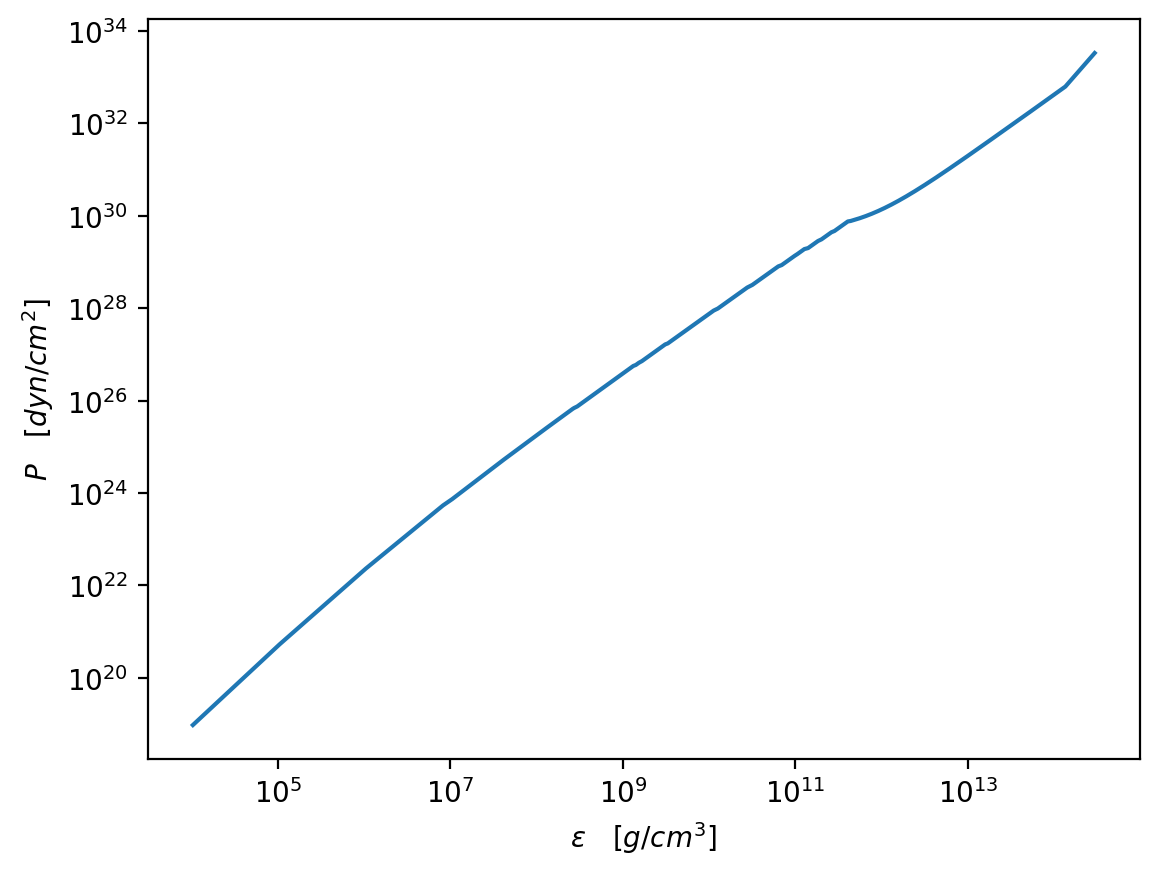

In [54]:
plt.figure(dpi = 200)
plt.plot(eps_total/(g_cm_3),pres_total/(dyn_cm_2))
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\epsilon\quad [g/cm^3]$")
plt.ylabel(r"$P \quad [dyn/cm^2]$")
plt.show()